# Computación en Física - Mead-Nelder Method (Amoeba)
# Student: Jefferson Alexander Romero Márquez
# Date: 27/10/2024

In [1]:
import pandas as pd # Importamos pandas para cargar el arhcivo que queremos

# Cargamos los datos sin ruido

In [2]:
# De esta forma cargamos los datos sin ruido del problema
df1=pd.read_csv('Data_Planckian_noNoise.txt', header=None, sep=(' '))
df1

,0,1
0,1.000000e+00,1.683616e-28
1,1.001001e+12,1.680927e-04
2,2.002002e+12,6.670670e-04
3,3.003003e+12,1.489032e-03
4,4.004004e+12,2.626182e-03
...,...,...
995,9.959960e+14,1.066268e-03
996,9.969970e+14,1.054228e-03
997,9.979980e+14,1.042321e-03
998,9.989990e+14,1.030545e-03


In [3]:
import numpy as np # Importamos numpy para tratar los datos como arrays

In [4]:
# Convertimos los datos cargados con pandas a arrays de numpy
data=np.array(df1)
data

array([[1.00000000e+00, 1.68361646e-28],
       [1.00100100e+12, 1.68092691e-04],
       [2.00200200e+12, 6.67067033e-04],
       ...,
       [9.97997998e+14, 1.04232065e-03],
       [9.98998999e+14, 1.03054468e-03],
       [1.00000000e+15, 1.01889880e-03]])

In [5]:
# Definimos la variable frequency que serán los datos de la primera columna de DataFrame
frequency=data[:,0]
frequency[:5] # Muestra los 5 primero valores

array([1.000000e+00, 1.001001e+12, 2.002002e+12, 3.003003e+12,
       4.004004e+12])

In [6]:
# Hacemos lo mismo con la segunda columna del DataFrame
intensity=data[:,1]
intensity[:5]

array([1.68361646e-28, 1.68092691e-04, 6.67067033e-04, 1.48903192e-03,
       2.62618224e-03])

In [7]:
# Normalizamos los datos de intensidad para que el valor máximo sea 1

intensity_normalized = intensity / np.max(intensity)
intensity_normalized

array([1.68361646e-28, 1.68092691e-04, 6.67067033e-04, 1.48903192e-03,
       2.62618224e-03, 4.07079879e-03, 5.81524832e-03, 7.85198341e-03,
       1.01735424e-02, 1.27725494e-02, 1.56417141e-02, 1.87738317e-02,
       2.21617829e-02, 2.57985336e-02, 2.96771348e-02, 3.37907227e-02,
       3.81325181e-02, 4.26958267e-02, 4.74740386e-02, 5.24606282e-02,
       5.76491540e-02, 6.30332584e-02, 6.86066675e-02, 7.43631909e-02,
       8.02967211e-02, 8.64012338e-02, 9.26707873e-02, 9.90995222e-02,
       1.05681661e-01, 1.12411509e-01, 1.19283451e-01, 1.26291956e-01,
       1.33431570e-01, 1.40696922e-01, 1.48082722e-01, 1.55583757e-01,
       1.63194895e-01, 1.70911083e-01, 1.78727347e-01, 1.86638790e-01,
       1.94640595e-01, 2.02728019e-01, 2.10896400e-01, 2.19141150e-01,
       2.27457758e-01, 2.35841788e-01, 2.44288880e-01, 2.52794748e-01,
       2.61355183e-01, 2.69966045e-01, 2.78623272e-01, 2.87322873e-01,
       2.96060928e-01, 3.04833591e-01, 3.13637087e-01, 3.22467710e-01,
      

In [8]:
import matplotlib.pyplot as plt # Importamos matplotlib para ver el comportamiento de nuestros datos

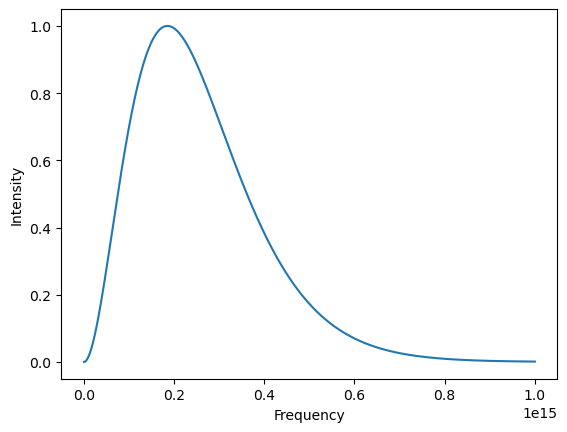

In [9]:
# Creamos la visualización
plt.plot(frequency,intensity)
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()

In [10]:
# Definimos las constantes que utilizaremos
h=6.67e-34 #Planck Constant
c=3e8 #Speed of light constant
kB=1.38e-23 #Boltzman constant

# Funciones definidas en clase

In [11]:
def planckian(nu, p):
    w1 = p[0]
    w2 = p[1]
    
    # Normalizar los pesos para que su suma sea 1
    dummy = w1 + w2
    w1 = w1 / dummy
    w2 = w2 / dummy
    
    # Calculamos las temperaturas T1 y T2, asegurando que estén en el rango [1000, 4000]
    T1 = 1000 * (1 + 3 * p[2])
    T2 = 1000 * (1 + 3 * p[3])
    
    # Calculamos la intensidad usando la ley de Planck modificada
    y = w1 / (np.exp(h * nu / (kB * T1)) - 1) + w2 / (np.exp(h * nu / (kB * T2)) - 1)
    
    # Multiplicamos por nu^3 para completar la expresión de la intensidad
    return y * nu**3

In [12]:
def scale_Factor(data, model):
    # Calculamos el factor de escala para ajustar la magnitud del modelo
    return np.sum(data * model) / np.sum(model * model)

In [13]:
# Definimos nuestra loss function que nos calcula el error cuadrático entre los datos y el modelo.
def loss_Function(data, model):
    A = scale_Factor(data, model)  # Factor de escala para ajustar la magnitud del modelo
    return np.sum((data - A*model) ** 2)

In [14]:
# Definimos una función para calcular el error del modelo que se usará en la optimización
def model_error(p, nu, data):
    # Calcula la intensidad usando la función planckian con los parámetros actuales
    model = planckian(nu, p)
    # Calcula la función de pérdida para medir la discrepancia entre los datos y el modelo
    loss = loss_Function(data, model)
    return loss

In [15]:
# Definimos la función de reflección
def reflecting(Ph, Pbar, refCoeff, nu, data):
    P1 = (1 + refCoeff) * Pbar - refCoeff * Ph
    L1 = loss_Function(data, planckian(nu, P1))
    return P1, L1

In [16]:
# Definimos la función de expansión 
def expanding(P1, Pbar, expCoeff, nu, data):
    P2 = expCoeff * P1 + (1 - expCoeff) * Pbar
    L2 = loss_Function(data, planckian(nu, P2))
    return P2, L2

In [17]:
# Definimos la función de contracción
def contracting(P1, Pbar, contCoeff, nu, data):
    P2 = contCoeff * P1 + (1 - contCoeff) * Pbar
    L2 = loss_Function(data, planckian(nu, P2))
    return P2, L2

In [18]:
# Definimos la función de retrying
def retry(P, retryCoeff):
    for ii in range(1, np.shape(P)[0]):
        P[ii, :] = (P[ii, :] + P[0, :]) * retryCoeff
    return P

# Implementación del método Nelder-Mead

In [19]:
# Definimos una función para iniciar un vertice alrededor del punto de dado
def initial_vertice(initial_p, scale=0.05):
    n = len(initial_p)
    vertice = np.zeros((n + 1, n))
    vertice[0] = initial_p
    
    # Creamos los otros puntos del vertice variando los paramétros
    for i in range(1, n + 1):
        p_value = np.copy(initial_p)
        p_value[i - 1] += scale * initial_p[i - 1]
        vertice[i] = p_value

    return vertice

In [20]:
# Definimos una función para aplicar el método de Nelder-Mead
def nelder_mead(vertice, nu, data, refCoeff=1.0, expCoeff=2.0, contCoeff=0.5, 
                retryCoeff=0.5, tol=1e-12, num_iter=1000):
    
    n = vertice.shape[1]
    loss = np.array([loss_Function(data, planckian(nu, p)) for p in vertice])
    
    count_iter = 0
    while count_iter < num_iter:
        # Ordenamos el vertice y las pérdidas usando los índices de los valores ordenados
        index = np.argsort(loss)
        vertice = vertice[index]
        loss = loss[index]
        
        # Calculamos el centroide de los mejores n puntos (excluyendo el peor)
        Pbar = np.mean(vertice[:-1], axis=0)
        
        # Aplicamos la reflexión
        Ph = vertice[-1]
        P1, L1 = reflecting(Ph, Pbar, refCoeff, nu, data)
        
        if L1 < loss[0]:  # Si es mejor que el mejor punto
            # Aplicamos la expansión
            P2, L2 = expanding(P1, Pbar, expCoeff, nu, data)
            if L2 < L1:
                vertice[-1] = P2
                loss[-1] = L2
            else:
                vertice[-1] = P1
                loss[-1] = L1
        elif L1 < loss[-2]:  # Si es mejor que el segundo peor punto
            # Aplicamos la reflexión
            vertice[-1] = P1
            loss[-1] = L1
        else:
            # Aplicamos la contracción
            if L1 < loss[-1]:
                P2, L2 = contracting(P1, Pbar, contCoeff, nu, data)
            else:
                P2, L2 = contracting(Ph, Pbar, contCoeff, nu, data)
            
            if L2 < loss[-1]:
                vertice[-1] = P2
                loss[-1] = L2
            else:
                # Reducimos el vertice
                vertice = retry(vertice, retryCoeff)
                loss = np.array([loss_Function(data, planckian(nu, p)) for p in vertice])
        
        # Comprobamos la convergencia
        if np.std(loss) < tol:
            break
        
        count_iter += 1

    # Obtenemos los mejores valores de P y la función de pérdida
    optimized_p = vertice[0]
    optimized_loss = loss[0]
    
    return optimized_p, optimized_loss

# Soluciones

In [21]:
# Definimos los valores iniciales para evaluar la función Nelder-Mead
initial_p = np.array([0.3, 0.7, 0.5, 0.5])  # Valores iniciales
vertice = initial_vertice(initial_p)

# Ejecutamos el algoritmo
optimized_p, optimized_loss = nelder_mead(vertice, frequency, intensity_normalized)

print("Optimized parameters:", optimized_p)
print('Loss Function:', optimized_loss)

Optimized parameters: [0.42812469 0.75553688 0.50873611 0.7907364 ]
Loss Function: 1.6306001843479742e-12


In [22]:
# Calculamos la intensidad ajustada con los parámetros optimizados y normalizamos
intensity_optimized = planckian(frequency, optimized_p)
intensity_optimized_normalized = intensity_optimized / np.max(intensity_optimized)

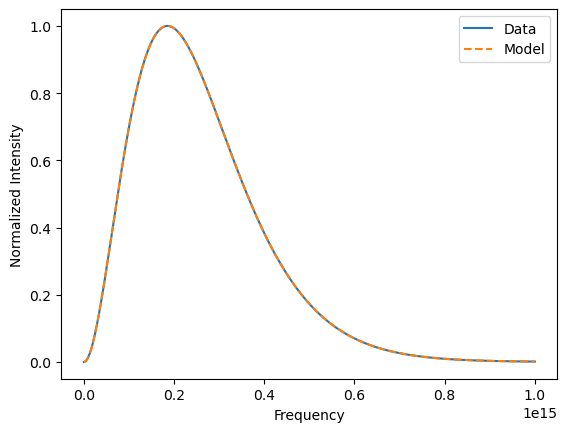

In [23]:
# Graficamos la intensidad experimental y la del modelo
plt.plot(frequency, intensity_normalized,label='Data')
plt.plot(frequency, intensity_optimized_normalized,label='Model',linestyle='--')
plt.xlabel('Frequency')
plt.ylabel('Normalized Intensity')
plt.legend()
plt.show()

In [24]:
# Extraemos los parámetros optimizados
w1, w2, T1, T2 = optimized_p

# Normalizamos los pesos w1 y w2 (obtendremos los valores deseados)
dummy = w1 + w2
w1 = w1 / dummy
w2 = w2 / dummy

# Calcular las temperaturas T1 y T2 (obtendremos los valores deseados)
T1 = 1000 * (1 + 3 * T1)
T2 = 1000 * (1 + 3 * T2)

# Mostramos los resultados
print("No Noise Parameters")
print(f'w1 = {w1}, w2 = {w2}')
print(f'T1 = {T1}, T2 = {T2}')

No Noise Parameters
w1 = 0.36169518765520564, w2 = 0.6383048123447942
T1 = 2526.2083242440053, T2 = 3372.2091985188617
